In [1]:
#!pip install catboost

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score,f1_score,classification_report


from catboost import Pool, CatBoostClassifier, cv, CatBoostRegressor
import sklearn.metrics as metrics
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
df=pd.read_csv('creditcard.csv')   

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [6]:
# Class is not balanced 

df['Class'].value_counts()

0.0    272779
1.0       482
Name: Class, dtype: int64

In [7]:
df = df.drop(['Time', 'Amount'], axis=1)
df = df.dropna()

In [8]:
label=df['Class']
data =df.drop(["Class"],axis=1)

In [9]:
print("Data Types\n{}".format(data.dtypes))

Data Types
V1     float64
V2     float64
V3     float64
V4     float64
V5     float64
V6     float64
V7     float64
V8     float64
V9     float64
V10    float64
V11    float64
V12    float64
V13    float64
V14    float64
V15    float64
V16    float64
V17    float64
V18    float64
V19    float64
V20    float64
V21    float64
V22    float64
V23    float64
V24    float64
V25    float64
V26    float64
V27    float64
V28    float64
dtype: object


In [10]:
null_counts = data.isnull().sum()
print("Number of null values in each feature:\n{}".format(null_counts))

Number of null values in each feature:
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
dtype: int64


**Split data 1/3 for the test and 2/3 for the train**

In [11]:
x_train,x_test,y_train,y_test = train_test_split(data,label,test_size=0.33,random_state=101)

In [12]:
print("Label 1, Before using SMOTE: {} ".format(sum(y_train==1)))
print("Label 0, Before using SMOTE: {} ".format(sum(y_train==0)))

Label 1, Before using SMOTE: 319 
Label 0, Before using SMOTE: 182765 


**Oversampling Data Using SMOTE**

In [13]:
OS = SMOTE(random_state=12)
x_train_OS, y_train_OS = OS.fit_sample(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [14]:
print("Label 1, After using SMOTE: {}".format(sum(y_train_OS==1)))
print("Label 0, After using SMOTE: {}".format(sum(y_train_OS==0)))

Label 1, After using SMOTE: 182765
Label 0, After using SMOTE: 182765


## Modeling

In [15]:
model = CatBoostClassifier(iterations=100,
                             depth=12,
                             eval_metric='AUC',
                             random_seed = 2018,
                             od_type='Iter',
                             metric_period = 1,
                             od_wait=100)

In [16]:
model.fit(x_train_OS,y_train_OS)

Learning rate set to 0.5
0:	total: 1s	remaining: 1m 39s
1:	total: 1.89s	remaining: 1m 32s
2:	total: 2.77s	remaining: 1m 29s
3:	total: 3.64s	remaining: 1m 27s
4:	total: 4.5s	remaining: 1m 25s
5:	total: 5.34s	remaining: 1m 23s
6:	total: 6.12s	remaining: 1m 21s
7:	total: 6.98s	remaining: 1m 20s
8:	total: 7.86s	remaining: 1m 19s
9:	total: 8.64s	remaining: 1m 17s
10:	total: 9.45s	remaining: 1m 16s
11:	total: 10.3s	remaining: 1m 15s
12:	total: 11s	remaining: 1m 13s
13:	total: 11.8s	remaining: 1m 12s
14:	total: 12.6s	remaining: 1m 11s
15:	total: 13.4s	remaining: 1m 10s
16:	total: 14.2s	remaining: 1m 9s
17:	total: 15.1s	remaining: 1m 8s
18:	total: 15.8s	remaining: 1m 7s
19:	total: 16.6s	remaining: 1m 6s
20:	total: 17.5s	remaining: 1m 5s
21:	total: 18.3s	remaining: 1m 5s
22:	total: 19s	remaining: 1m 3s
23:	total: 19.9s	remaining: 1m 2s
24:	total: 20.5s	remaining: 1m 1s
25:	total: 21.2s	remaining: 1m
26:	total: 21.9s	remaining: 59.2s
27:	total: 22.7s	remaining: 58.4s
28:	total: 23.4s	remaining: 

In [17]:
predict = model.predict(x_test)

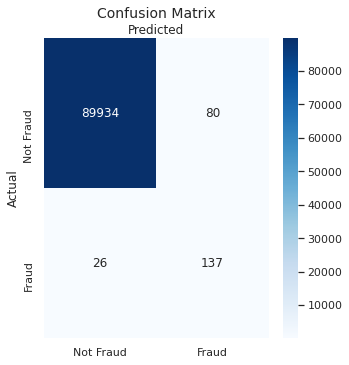

In [18]:
cm = pd.crosstab(y_test, predict, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))

sns.heatmap(pd.DataFrame(cm), annot=True, cmap="Blues" ,fmt='g',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],)
ax1.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1,fontsize=14)
plt.show()

In [19]:
acc=accuracy_score(y_test,predict)
print('Accuracy =' ,acc)

Accuracy = 0.9988245339720772


In [20]:
precision = precision_score(y_test, predict)
print('Precision =' ,precision)

Precision = 0.631336405529954


In [21]:
auc_score=roc_auc_score(y_test, predict)
print('AUC =' ,auc_score)

AUC = 0.9198010234536114


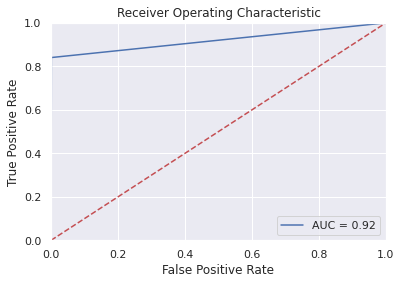

In [22]:
fpr, tpr, threshold = metrics.roc_curve(y_test, predict)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [25]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     90014
         1.0       0.63      0.84      0.72       163

    accuracy                           1.00     90177
   macro avg       0.82      0.92      0.86     90177
weighted avg       1.00      1.00      1.00     90177



In [23]:
recall = recall_score(y_test, predict)
print("Recall : ",recall )

Recall :  0.8404907975460123


In [24]:
f1score = f1_score(y_test,predict, average='macro')
print("F1 Score : ",f1score )

F1 Score :  0.8602318288080208
